In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates as mdates
import pandas as pd
from scipy.stats import norm
from datetime import timedelta, datetime

# Open DataFrame

## Pulse Data

In [6]:
df = pd.read_csv('datafiles/june4/data1.csv', sep=',', index_col=0)
df['ratio']=df['Integral 1200']/df['Integral 7400']
df = df[df['Integral 7400']>0]

df.index = pd.to_datetime(df.index,unit='s')-timedelta(hours=7)
df.head()

,Integral 1200,Integral 7400,ratio
Time,,,
2018-06-04 14:25:27.360230,67986.0,111746.0,0.608398
2018-06-04 14:25:24.726306,37655.0,53317.0,0.706248
2018-06-04 14:25:25.112669,70037.0,117233.0,0.597417
2018-06-04 14:25:25.905151,53668.0,88457.0,0.606713
2018-06-04 14:25:26.029616,267520.0,448843.0,0.596021


## Temperature Data

In [14]:
temps = pd.read_csv('datafiles/june4/june4temp.txt', skiprows=7, sep='\t')
temps['Time'] = pd.to_datetime(temps['DATE']+'-'+temps['TIME'])
temps.index = temps['Time']
temps = temps[['TEMPERATURE', 'RELATIVE-HUMIDITY', 'DEW-POINT']]

In [15]:
temps.head()

,TEMPERATURE,RELATIVE-HUMIDITY,DEW-POINT
Time,,,
2018-06-04 14:35:25,22.8,34.8,6.4
2018-06-04 14:45:25,22.1,35.9,6.3
2018-06-04 14:55:25,21.9,36.3,6.2
2018-06-04 15:05:25,21.8,35.9,6.0
2018-06-04 15:15:25,21.7,36.2,6.0


# Preliminary Plot

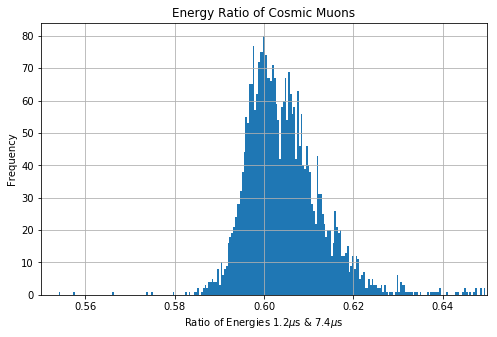

In [16]:
fig, ax = plt.subplots(figsize=(8,5))

df['ratio'].hist(bins=1000, ax=ax)

ax.set_xlim(0.55,0.65)
ax.set_xlabel('Ratio of Energies 1.2$\mu$s & 7.4$\mu$s')
ax.set_ylabel('Frequency')
ax.set_title('Energy Ratio of Cosmic Muons')
plt.show()

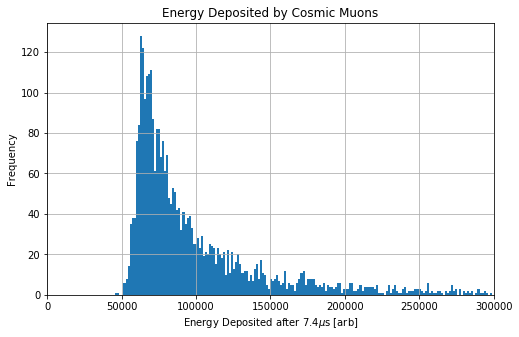

In [17]:
fig, ax = plt.subplots(figsize=(8,5))


df['Integral 7400'].hist(bins=1000, ax=ax)
ax.set_xlim(0,300000)
ax.set_xlabel('Energy Deposited after 7.4$\mu$s [arb]')
ax.set_ylabel('Frequency')
ax.set_title('Energy Deposited by Cosmic Muons')

plt.show()

# Fitting Methods to Find the Mode

Only fit values between 0.59 and 0.61 to normal curve:

In [18]:
mask = (df['ratio']>0.59) & (df['ratio']<0.61)
(mu, sigma) = norm.fit(df['ratio'][mask])

Get x and y values:

In [19]:
x = np.linspace(0.59, 0.61, 1000)

def gaussian(x, mu, sig):
    return (1/(np.sqrt(2*np.pi)*sig))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

Do plotting:

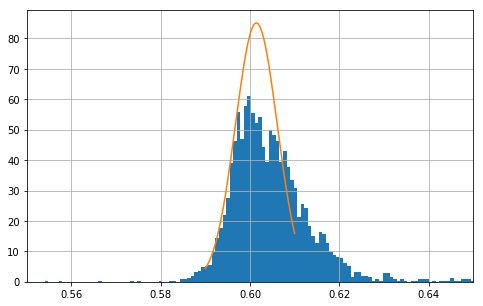

In [20]:
fig, ax = plt.subplots(figsize=(8,5))

df['ratio'].hist(bins=500, ax=ax, density=True)
ax.plot(x, gaussian(x, mu, sigma))

ax.set_xlim(0.55,0.65)
plt.show()

# 2D Histogram Stuff:

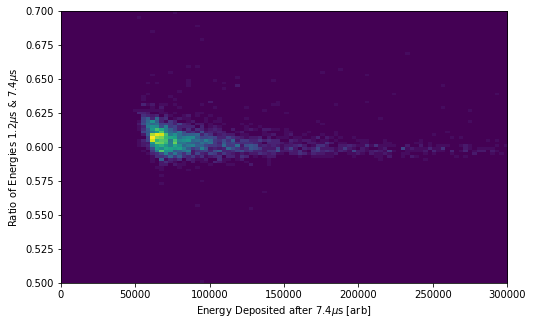

In [21]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist2d(df['Integral 7400'].values, df['ratio'].values,
          range=np.array([(0, 300000), (0.5, 0.7)]), bins=100)

ax.set_xlabel('Energy Deposited after 7.4$\mu$s [arb]')
ax.set_ylabel('Ratio of Energies 1.2$\mu$s & 7.4$\mu$s')

plt.show()

# Plot Some Temperature Stuff

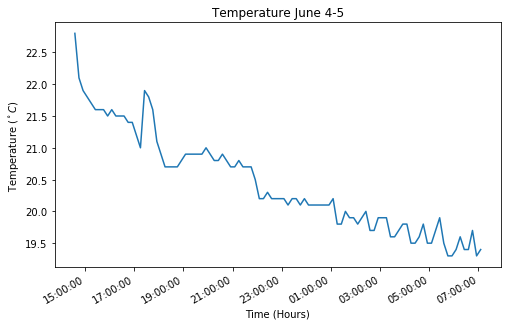

In [23]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(temps['TEMPERATURE'])

xfmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
fig.autofmt_xdate()

ax.set_title('Temperature June 4-5')
ax.set_ylabel('Temperature ($^\circ C$)')
ax.set_xlabel('Time (Hours)')

plt.show()